# Naive Bayes

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt                        # To create plots
import numpy as np                                     # To perform calculations quickly
import pandas as pd                                    # To load in and manipulate data
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB          # Naive bayes model
from sklearn.model_selection import train_test_split   # Split up the data in a train and test set
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from ipywidgets import interact,widgets                # For interactive execution of code

## Discriminative vs generative classification
Until now we have always learnt to determine a border between classes. This is called **discriminative** classification.

This means the model has no idea what the distributions for a class are.

Take for example a model that can distinguish between cats and dogs. The models thus far just calculate a border that says: this is a cat and this is a dog. The model itself however, has no idea of what it means to be a cat. What distribution of features makes a cat really a cat.

A model that does learn these distributions is called a **generative** classifier.

A difference is shown below
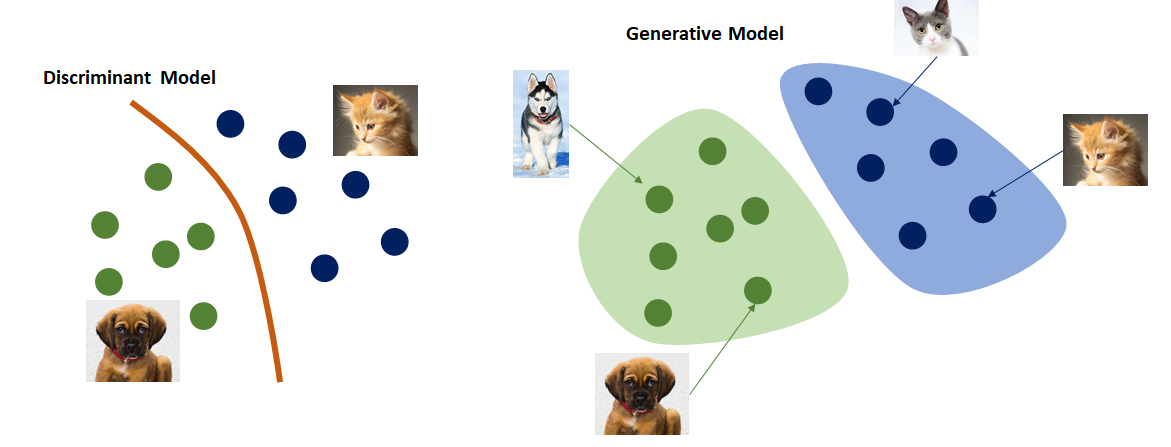

**Discriminative classifier:** learns P(y|x) (=also called the posterior)
* Posterior = What is the chance that it is y given an observation x

**Generative classifier:** learns P(x|y) (also called the likelihood) and P(y) (also called the prior)
* Likelihood = what is the chance that our observation is x when it is class y
* Prior = what is the chance of being the class

Aditionally, we can also define P(x): the marginal
* Marginal = what is the chance of having observation x

-> What do features look like for a class?

We can define P(x|y) as following:

$P(x|y) = \Large\frac{P(y|x)*P(x)}{P(y)}$


Examples of discriminative models: **Logistic regression**, SVM, **Decision trees**, **Neural Networks**

Examples of generative models: **Naive Bayes**, Hidden markov model, Variational autoencoders


## Example
The chance a person has cancer is <span style='color:blue '>1%</span> => P(cancer)=0.01 = prior

The chance a person does not have cancer is thus <span style='color:orange '>99%</span>

We know that the test
* is positive in <span style='color:red '>90%</span> of the cases whenever you have cancer (=sensitivity)
* is negative in 90% of the cases whenever you don't have cancer (=specificity) => <span style='color:green '>10%</span> chance it will be positive when you don't have cancer

=> If the test is positive, what will be the chance that you have cancer?

$ P(cancer|positive)=\Large\frac{P(positive|cancer)*P(cancer)}{P(positive)}$

$P(cancer|positive) = \Large\frac{\color{red}{\text{0.90}}*\color{blue}{\text{0.01}}}{\color{blue}{\text{0.01}}*\color{red}{\text{0.90}}+\color{orange}{\text{0.99}}*\color{green}{\text{0.1}}}=0.0833 = 8.33\%$

**Prior**: P(cancer): Withouth knowing the result: what is the chance a person has cancer?

**Likelihood**: P(positive|cancer): How probable is it that the test is positive in case the person would have cancer?

**Marginal**: P(positive): How likely is it the test would be positive in general?

**Posterior**: P(cancer|positive): What is the chance a person does indeed have cancer if the test was positive?

## Weather dataset

In [2]:
# Read in the dataset and take a look at the first rows
data=pd.read_csv("data/weather.csv",sep=",")
data.head()

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes


<AxesSubplot:xlabel='play', ylabel='count'>

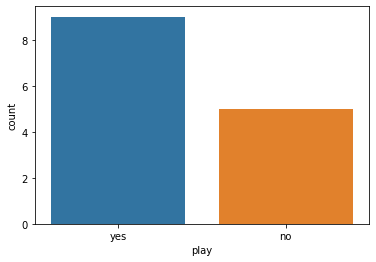

In [3]:
# Take a look at the distribution of the target values (play column)
sns.countplot(data=data,x="play")

### Detect if we play

$P(H|e) = \Large\frac{P(e|H)P(H)}{P(e)}$

H=hypothesis (we play), e= evidence (the features)

P(H|e): The chance we play based on the features

P(e|H): The chance we find these features if we play

P(H): The chance we play in general

P(e): The chance we get this specific feature => we need to split up our rule in multiple values for our different features

<hr>
$P(play|outlook,temperature,humidity,windy) = \Large\frac{P(outlook,...,windy|play)*P(play)}{P(outlook,...,windy)}$
$P(play|outlook,temperature,humidity,windy) = \Large\frac{P(outlook|windy,...,play)*P(temperature|humidity,...,play)*...*P(play)}{P(outlook,...,windy)}$

=> $P(outlook|windy,...,play)$ is the probability that we find this specific feature given all other possible features and given that we play

=> Difficult to calculate! => **Naive Bayes** strategy

Naive Bayes looks at each feature independently of the other features

=>$P(play|outlook,...windy)=\Large\frac{P(outlook|play)*P(temperature|play)*P(humidity|play)*P(windy|play)*P(play)}{P(outlook,temperature,humidity,windy}$

With for example: P(outlook|play) = the chance we have a specific outlook when we play

=> $P(play|outlook,...windy)=\Large\frac{P(play)\prod_{i=1}^n{P(feature_i|play)}}{P(outlook,temperature,humidity,windy)}$

We can simplify this a bit by not calculating exact chances but take a look at the highest probabilities: so we can drop the marginal (denominator)

$P(play|outlook,...windy)\propto P(play)\prod_{i=1}^n{P(feature_i|play)}$

In [4]:
print("Total amount of play=yes:",data.play.value_counts()["yes"])
print("Total amount of play=no:",data.play.value_counts()["no"])

Total amount of play=yes: 9
Total amount of play=no: 5


In [5]:
# Pandas grouping of values by specific columns, we will use the numbers we get here later on.
df_outlook  = data.groupby(by=["play","outlook"]).size().reset_index(name='counts')
df_temp     = data.groupby(by=["play","temperature"]).size().reset_index(name='counts')
df_humidity = data.groupby(by=["play","humidity"]).size().reset_index(name='counts')
df_windy    = data.groupby(by=["play","windy"]).size().reset_index(name='counts')

# Show our calculated values
display(df_outlook)
display(df_temp)
display(df_humidity)
display(df_windy)

print(f"Chance of playing = 9/(9+5)= {round(100*9/(9+5))}%")
print(f"Chance of not playing = 5/(9+5)= {round(100*5/(9+5))}%")

,play,outlook,counts
0,no,rainy,2
1,no,sunny,3
2,yes,overcast,4
3,yes,rainy,3
4,yes,sunny,2


,play,temperature,counts
0,no,cool,1
1,no,hot,2
2,no,mild,2
3,yes,cool,3
4,yes,hot,2
5,yes,mild,4


,play,humidity,counts
0,no,high,4
1,no,normal,1
2,yes,high,3
3,yes,normal,6


,play,windy,counts
0,no,False,2
1,no,True,3
2,yes,False,6
3,yes,True,3


Chance of playing = 9/(9+5)= 64%
Chance of not playing = 5/(9+5)= 36%


Let's classify following input based on the values above:

|outlook|temperature|humidity|windy|
|---|---|---|---|
|sunny|hot|high|False|

$ P(play|input)\propto P(play)*P(sunny|play)*P(hot|play)*P(high|play)*P(False|play)$

$ =0.64\% * \frac{2}{9} * \frac{2}{9} * \frac{3}{9} * \frac{6}{9} = 0.0070$

$ P(noplay|input)\propto P(noplay)*P(sunny|noplay)*P(hot|noplay)*P(high|noplay)*P(False|noplay)$

$ =0.36\% * \frac{3}{5} * \frac{2}{5} * \frac{4}{5} * \frac{2}{5} = 0.0492$

=> 0.0492 > 0.0070 = No playing on this day


What if we wanted to classify

|outlook|temperature|humidity|windy|
|---|---|---|---|
|overcast|hot|high|False|

Since there is not a single day that we don't play and the weather is overcast:

=> P(overcast|noplay) = 0/5 = 0 => P(noplay|input) = 0

To prevent this we can apply **Laplacian smoothing** (= add-one smoothing). This will add a small chance to unseen situations as to not immediately give it a chance of 0.

### Laplacian smoothing
$P(f_s) = \Large\frac{C(f_s) + \alpha}{N+\alpha V}$

$P(f_s)$ = the chance of a specific value for a certain feature in a certain situation) (e.g. P(overcast when play=No))

$C(f_s)$ = the amount of times a value occurs for a certain feature in a certain situation) (e.g. #overcast when play=No: 0)

N = the total amount a certain situation occurs (e.g. #play=No: 5)

V = possible values per feature

$\alpha$: the smoothing parameter

#### Let's try it again for the last example with $\alpha$=<span style="color:blue">1</span>:

Number of possible values per features (outlook= <span style="color:red">3</span>, temperature= <span style="color:red">3</span>, humidity= <span style="color:red">2</span>, windy= <span style="color:red">2</span>, play= <span style="color:red">2</span>)

$ P(play|input)\propto P(play)*P(overcast|play)*P(hot|play)*P(high|play)*P(False|play)$

$ = \frac{9+\color{blue}{\text{1}}}{14+\color{blue}{\text{1}}*\color{red}{\text{2}}} * \frac{2+\color{blue}{\text{1}}}{9+\color{blue}{\text{1}}*\color{red}{\text{3}}} * \frac{2+\color{blue}{\text{1}}}{9+\color{blue}{\text{1}}*\color{red}{\text{3}}} * \frac{3+\color{blue}{\text{1}}}{9+\color{blue}{\text{1}}*\color{red}{\text{2}}} * \frac{6+\color{blue}{\text{1}}}{9+\color{blue}{\text{1}}*\color{red}{\text{2}}} = 0.0090$

$ P(noplay|input)\propto P(noplay)*P(overcast|noplay)*P(hot|noplay)*P(high|noplay)*P(False|noplay)$

$ = \frac{5+\color{blue}{\text{1}}}{14+\color{blue}{\text{1}}*\color{red}{\text{2}}} * \frac{0+\color{blue}{\text{1}}}{5+\color{blue}{\text{1}}*\color{red}{\text{3}}} * \frac{2+\color{blue}{\text{1}}}{5+\color{blue}{\text{1}}*\color{red}{\text{3}}} * \frac{4+\color{blue}{\text{1}}}{5+\color{blue}{\text{1}}*\color{red}{\text{2}}} * \frac{2+\color{blue}{\text{1}}}{5+\color{blue}{\text{1}}*\color{red}{\text{2}}} = 0.0054$

=> 0.0090>0.0054 = play on this day!

### Log usage
As you can see we get very small numbers. For bigger datasets, this could result in a floating-point underflow (0.000000001 would just become 0)

We can solve this by using log function:

$log(x*y) = log(x) + log(y)$

=> $log(P(play|input))\propto log(P(play)*\prod_{i=1}^nP(input|play))$

=> $log(P(play|input))\propto log(P(play)) + \sum_{i=1}^nlog(P(input|play))$

For our last example this would mean:

$ log(P(play|input))\propto log(P(play))+log(P(overcast|play))+log(P(hot|play))+log(P(high|play))+log(P(False|play))$

$ =log(\frac{9+\color{blue}{\text{1}}}{14+\color{blue}{\text{1}}*\color{red}{\text{2}}}) + log(\frac{2+\color{blue}{\text{1}}}{9+\color{blue}{\text{1}}*\color{red}{\text{3}}}) + log(\frac{2+\color{blue}{\text{1}}}{9+\color{blue}{\text{1}}*\color{red}{\text{3}}}) + log(\frac{3+\color{blue}{\text{1}}}{9+\color{blue}{\text{1}}*\color{red}{\text{2}}}) + log(\frac{6+\color{blue}{\text{1}}}{9+\color{blue}{\text{1}}*\color{red}{\text{2}}}) = -2.0438$

$ log(P(noplay|input))\propto log(P(noplay))+log(P(overcast|noplay))+log(P(hot|noplay))+log(P(high|noplay))+log(P(False|noplay))$

$ =log(\frac{5+\color{blue}{\text{1}}}{14+\color{blue}{\text{1}}*\color{red}{\text{2}}}) + log(\frac{0+\color{blue}{\text{1}}}{5+\color{blue}{\text{1}}*\color{red}{\text{3}}}) + log(\frac{2+\color{blue}{\text{1}}}{5+\color{blue}{\text{1}}*\color{red}{\text{3}}}) + log(\frac{4+\color{blue}{\text{1}}}{5+\color{blue}{\text{1}}*\color{red}{\text{2}}}) + log(\frac{2+\color{blue}{\text{1}}}{5+\color{blue}{\text{1}}*\color{red}{\text{2}}}) = -2.2691$

=> -2.0438>-2.2691 = play on this day! (without risking underflow)

## Using sklearn

In [8]:
# Split into features and targets
X=data.drop("play",axis=1)
y=data["play"]

In [9]:
# Sklearn can't work with actual text values, like we did before, so we need to create dummy columns.
# For each outlook, we will create a column, the value will be 1 if we have the specific outlook.
# Windy is a binary column, True, False, so here we don't need dummy collumns, just 0 and 1
X_dummies = pd.get_dummies(data=X)
X_dummies.replace({True:1,False:0},inplace=True)
X_dummies.head()

,windy,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal
0,0,1,0,0,0,1,0,1,0
1,1,1,0,0,1,0,0,0,1
2,1,1,0,0,0,0,1,1,0
3,0,1,0,0,0,1,0,0,1
4,0,0,1,0,0,0,1,1,0


In [10]:
# Predict new value:
# outlook	temperature	humidity	windy
# overcast	hot     	high    	False

# Normally this would be a test set, or you would also read this in from a csv -> now we need to create a new 
# dataframe with our new measurement
new_measurement = pd.DataFrame([["sunny","hot","high",False]],columns=["outlook","temperature","humidity","windy"])
# create dummy columns for the table
nm_dummies = pd.get_dummies(data=new_measurement)
# replace True and False in windy by 1 and 2
nm_dummies.replace({True:1,False:0},inplace=True)

# Take a look at our new dataset,
display(nm_dummies)
print("""
A lot of possible values are missing in the table above. We need to have the same length of features in our
train and test set. We can do this by aligning our train and test set. This will match up the columns. If the
column is not present in the train or test set, we will fill in a 0 (fill_value)""")

final_train, final_test = X_dummies.align(nm_dummies,join='outer',axis=1, fill_value=0)
display(final_test)
print("As we can see, our new table has all possible columns that are present in our training set as well!")

# Create a multinomial naive bayes model with a laplacian operator (alpha) of 1
model = MultinomialNB(alpha=1)
# Fit the model
model.fit(final_train,y)
# Check the score for our training set
print("Score training set: ",model.score(final_train,y))

#Check our test case
print("Shall we play on this day?",model.predict(final_test))
print("Score without log function:",model.predict_proba(final_test))
print("Score with log function:",model.predict_log_proba(final_test))
print("The classes of the model (corresponging with scores above)",model.classes_)

# Note that our scores do not correspond exactly with what we calculated manually, because it does calculate the actual
# chance for being one or the other (sum of both should be 1). We only looked at what the largest value was.

,windy,outlook_sunny,temperature_hot,humidity_high
0,0,1,1,1



A lot of possible values are missing in the table above. We need to have the same length of features in our
train and test set. We can do this by aligning our train and test set. This will match up the columns. If the
column is not present in the train or test set, we will fill in a 0 (fill_value)


,humidity_high,humidity_normal,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,windy
0,1,0,0,0,1,0,1,0,0


As we can see, our new table has all possible columns that are present in our training set as well!
Score training set:  0.9285714285714286
Shall we play on this day? ['no']
Score without log function: [[0.73618111 0.26381889]]
Score with log function: [[-0.30627912 -1.33249242]]
The classes of the model (corresponging with scores above) ['no' 'yes']


In [11]:
# Note that if we would try to predict ["overcast","hot","high",False] with an alpha of 0, we should get a score
# of 0 for not playing. So let's try that:

new_measurement = pd.DataFrame([["overcast","hot","high",False]],columns=["outlook","temperature","humidity","windy"])
nm_dummies = pd.get_dummies(data=new_measurement)
nm_dummies.replace({True:1,False:0},inplace=True)

final_train, final_test = X_dummies.align(nm_dummies,join='outer',axis=1, fill_value=0)

# model with alpha=0
model = MultinomialNB(alpha=0)
# Fit the model
model.fit(final_train,y)

#Check our test case
print("Shall we play on this day?",model.predict(final_test))
print("Score without log function:",model.predict_proba(final_test))
print("The classes of the model (corresponging with scores above)",model.classes_)

# Indeed, the score is very very small, and basically zero. The reason why it is not zero is because sklearn detects
# that we want to set is very small, and replaces our alpha of 0 with 1.0e-10

Shall we play on this day? ['yes']
Score without log function: [[8.5733882e-11 1.0000000e+00]]
The classes of the model (corresponging with scores above) ['no' 'yes']


C:\Users\cedri\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


## The iris dataset
In the next part we will see that technique is also possible for numeric values. 

The iris dataset contains 4 features and 1 target

Features:
* Sepal length
* Sepal width
* Petal length
* Petal width

Target:
* Species
---


In [12]:
# Load in the data and take a look at the first rows
data = pd.read_csv("data/iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
# Describe the data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
# ID is not informative => drop it
data.drop("Id",axis=1,inplace=True)

In [15]:
#Split into features and targets
X=data.drop("Species",axis=1)
y=data["Species"]

In [16]:
# Split into training and test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [17]:
# Create an empty multinomial naive bayes model
model = MultinomialNB(alpha=1)

# Fit the model
model.fit(X_train,y_train)

# Print both the score for the training and the test set
print("Train score:",model.score(X_train,y_train))
print("Test score:",model.score(X_test,y_test))

print()
# Predict some flowers and show the probabilities
print("Predict the species for a flower with features",X_test.values[0])
print("The actual class is:",y_test.values[0], ". The predicted class is:",model.predict(X_test.values[0].reshape(1,-1)))
probabilities = model.predict_proba(X_test.values[0].reshape(1,-1))[0]
print("The values for each class are:", *[f"\t{cla}:{round(val,2)}" for cla,val in zip(model.classes_,probabilities)],sep="\n")


print()
# Predict some flowers and show the probabilities
print("Predict the species for a flower with features",X_test.values[1])
print("The actual class is:",y_test.values[1], ". The predicted class is:",model.predict(X_test.values[1].reshape(1,-1)))
probabilities = model.predict_proba(X_test.values[1].reshape(1,-1))[0]
print("The values for each class are:", *[f"\t{cla}:{round(val,3)}" for cla,val in zip(model.classes_,probabilities)],sep="\n")

print()

print("""Note that the score is very dependent on the random state you set for your train_test_split because 
      this is fairly small dataset""")

Train score: 0.875
Test score: 0.8666666666666667

Predict the species for a flower with features [6.4 2.8 5.6 2.1]
The actual class is: Iris-virginica . The predicted class is: ['Iris-virginica']
The values for each class are:
	Iris-setosa:0.01
	Iris-versicolor:0.48
	Iris-virginica:0.52

Predict the species for a flower with features [5.7 3.8 1.7 0.3]
The actual class is: Iris-setosa . The predicted class is: ['Iris-setosa']
The values for each class are:
	Iris-setosa:0.684
	Iris-versicolor:0.215
	Iris-virginica:0.101

Note that the score is very dependent on the random state you set for your train_test_split because 
      this is fairly small dataset


In [18]:
# Make a confusion matrix and classification report
y_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16  0  0]
 [ 0  5  0]
 [ 0  4  5]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.56      1.00      0.71         5
 Iris-virginica       1.00      0.56      0.71         9

       accuracy                           0.87        30
      macro avg       0.85      0.85      0.81        30
   weighted avg       0.93      0.87      0.87        30

